In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [14]:
import pandas as pd
import io

file_name = list(uploaded.keys())[0]  # Get uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

In [16]:
print("📊 Descriptive Stats:\n", df.describe())


📊 Descriptive Stats:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.00000

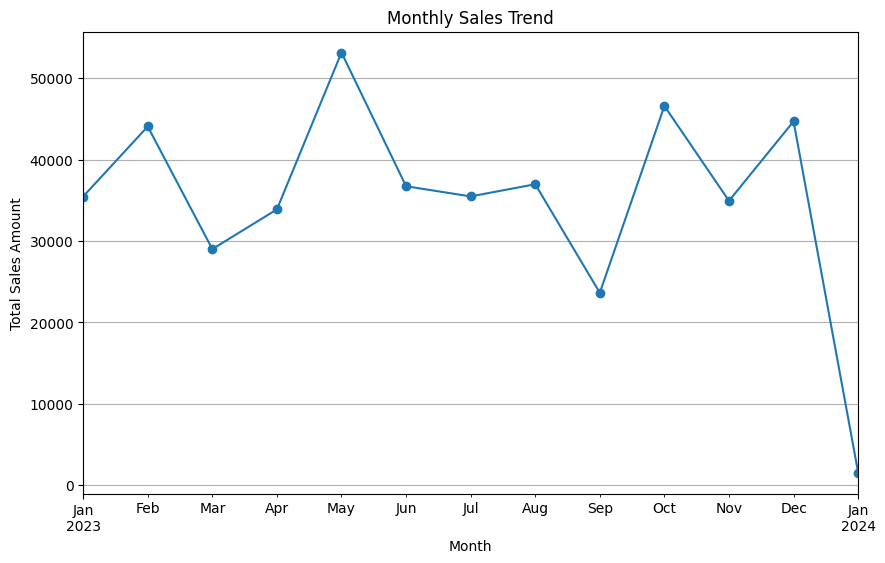

In [17]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,6), title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid()
plt.show()

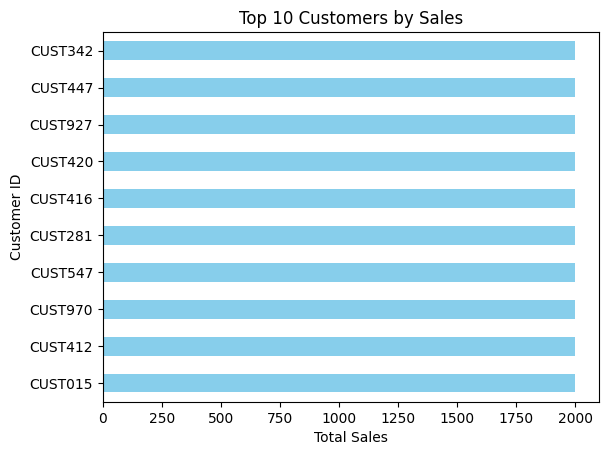

In [18]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', color='skyblue', title='Top 10 Customers by Sales')
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.show()

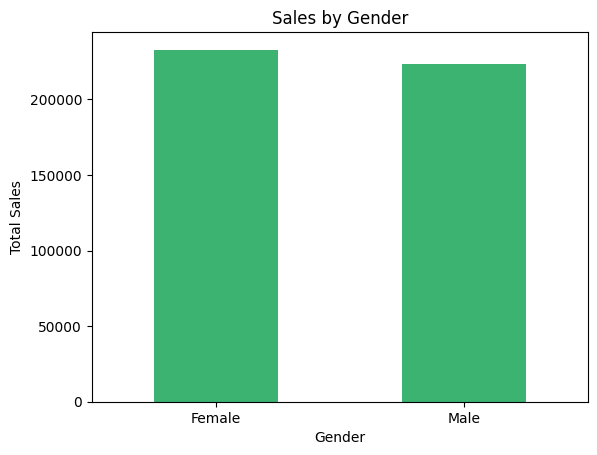

In [19]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', color='mediumseagreen', title='Sales by Gender')
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

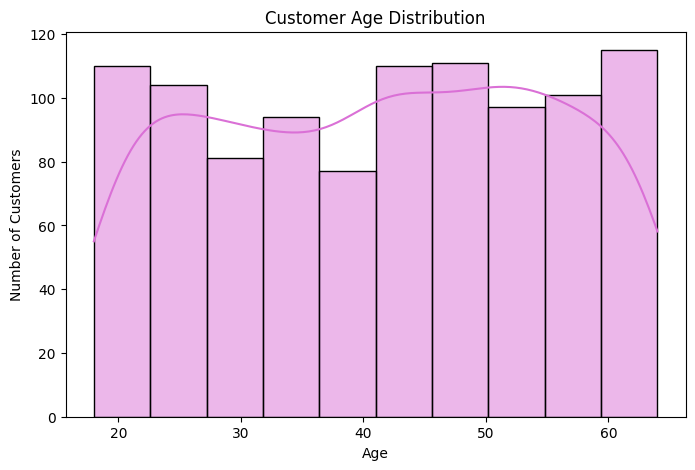

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True, color='orchid')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

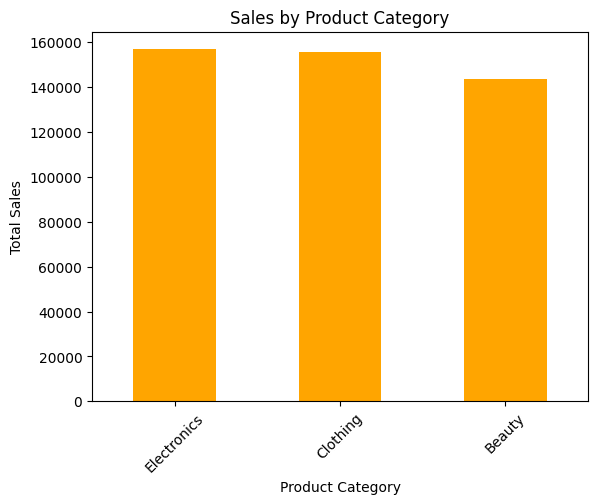

In [21]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='orange', title='Sales by Product Category')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

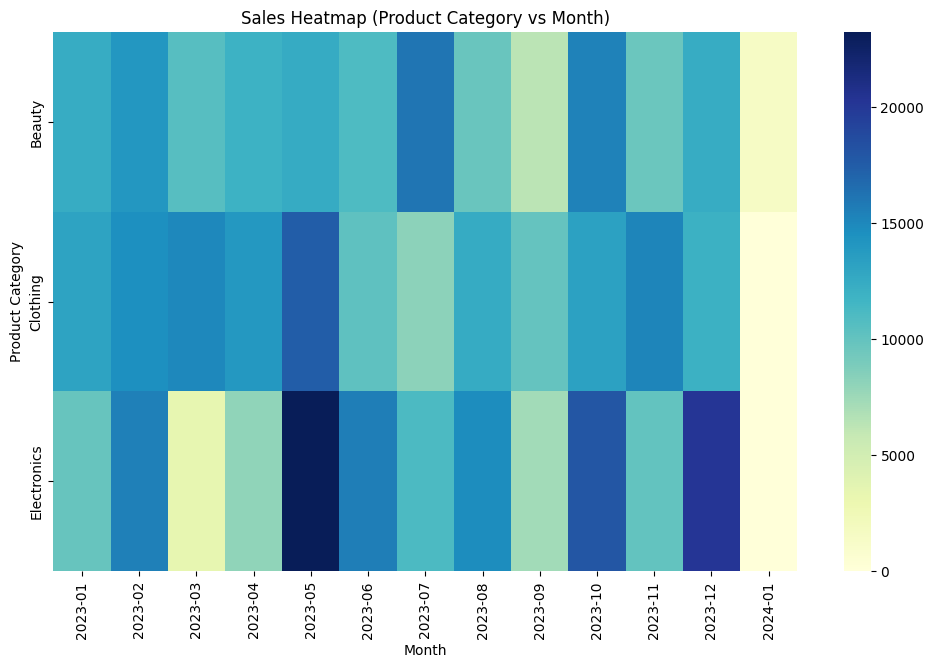

In [22]:
heatmap_data = df.groupby(['Product Category', 'Month'])['Total Amount'].sum().unstack().fillna(0)
plt.figure(figsize=(12,7))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Sales Heatmap (Product Category vs Month)")
plt.show()

In [23]:
print("\n✅ Recommendations:")
print(f"- Focus on high-selling category: {category_sales.idxmax()}")
print(f"- Target more ads to {gender_sales.idxmax()} customers.")
print("- Track younger age groups with high spending.")
print("- Improve or replace poorly performing categories.")


✅ Recommendations:
- Focus on high-selling category: Electronics
- Target more ads to Female customers.
- Track younger age groups with high spending.
- Improve or replace poorly performing categories.
